<a href="https://colab.research.google.com/github/luizleroy/predictive_analytics/blob/develop/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction to Predictive Analysis with Colab and Python**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href=""><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/luizleroy/predictive_analytics/blob/develop/new.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Welcome to this Colab! I will get a quick introduction to the Analysis with Colab and Python to Predictive Analysis.

Colab is a Python development environment that runs in the browser using Google Cloud.

Agora, vamos na língua de Camões mesmo, hehehe. Pois, po principal objetivo aqui é criar insumos, 'pedaços' de código mesmo, para utilizar em projetos de P&D.

**Algoritmos preditivos**

A proposta via TI para este PD era entregar os seguintes grupos de algoritmos:



*   Criar algoritmos situacionais de DEC e FEC, implantando relatórios na plataforma PTC referentes a dados que já existem em outras plataformas nas concecionários hoje.
*   Implementar um grupo de algoritmos o preditivos, ou seja, no início do ano, sem informações futuras, devo rodar um cálculo, usando alguma metodologia que prevê como será o comportamento dos conjuntos no ano vindouro. Quais conjuntos ficarão acima da meta e quais ficarão dentro (abaixo) da meta. Os arquivos com as metas nos já temos, mas a distribuição destes dados foi modelada e vai ser um ponto de atenção pois foram criadas tabelas para cada mês do ano, para um horizonte de alguns anos, ou seja, para o mês de janeiro existe a tabela DEC_FEC_JAN_2021, então são 12 tabelas para cada ano. Para somar o DEC no ano, você tem que abrir 12 tabelas.

Para o preditivo, as informações que temos são:
1. Topologia da rede elétrica por alimentador e conjunto, onde sei quem é urbano e quem é rural.

2. Dados de DEC FEC históricos , creio que com 3 anos de históricos eu consigo ver o comportamento dos conjuntos ao longo do ano (sazonalidades) e consigo fazer através de regressão linear, uma previsão se o conjunto vai manter, abaixar ou superar sua meta se nada for investido nele.

3. Implementar usando metodologia análoga a anterior, a previsão para DEC FEC urbano e rural.

# Imports

In [ ]:
#!pip install sklearn

In [ ]:
import numpy as np
import pandas as pd
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# Possíveis tratamentos

Será necessário tratar dados reais. Sempre é. Deixarei aqui um 'log' para possíveis tratamentos.

Geralmente é considerado o percentual de 5% para o atributo ser considerado Raro, o que causaria overfitting. Em algumas situações onde exitem poucos atributos, pode ser que sejam úteis esses atributos raros. Porém, se a variável possuir muitos atributos, deve ser descartado.

Formas de tratar os atributos raros:
*   Substituir o atributo raro para o atributo mais frequente.
*   Agrupar os atributos em uma nova categoria (exemplo: raro, outros).
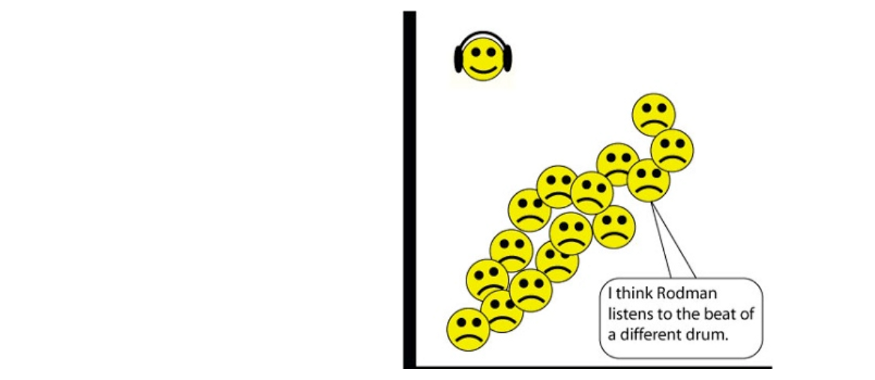

FONTE: https://medium.com/@alegeorgelustosa/an%C3%A1lise-explorat%C3%B3ria-e-preditiva-do-dataset-titanic-em-python-fbd5e5bb7328#

Entre outros tratamentos...

# Dados de entrada - Quarteto de Anscombe

In [ ]:
data = pd.read_json('sample_data/anscombe.json')


In [ ]:
input_data = data['X']
output_data = data['Y']
X1 = input_data[0:11]
Y1 = output_data[0:11].values
Y2 = output_data[11:22].values
Y3 = output_data[22:33].values

X4 = input_data[33:44].values
Y4 = output_data[33:44].values
ascombe = {
            "Y": X1,
            "X1":Y1,
            "X2":Y2,
            "X3":Y3,
            "X4":X4,
            "Y4":Y4,
}
data_para_treinamento_ascombe = pd.DataFrame(ascombe)
print(data_para_treinamento_ascombe)
print('-----------------------------------------------------------------------')
data_para_treinamento_ascombe.describe()

     Y     X1    X2     X3  X4     Y4
0   10   8.04  9.14   7.46   8   6.58
1    8   6.95  8.14   6.77   8   5.76
2   13   7.58  8.74  12.74   8   7.71
3    9   8.81  8.77   7.11   8   8.84
4   11   8.33  9.26   7.81   8   8.47
5   14   9.96  8.10   8.84   8   7.04
6    6   7.24  6.13   6.08   8   5.25
7    4   4.26  3.10   5.39  19  12.50
8   12  10.84  9.13   8.15   8   5.56
9    7   4.81  7.26   6.42   8   7.91
10   5   5.68  4.74   5.73   8   6.89
-----------------------------------------------------------------------


,Y,X1,X2,X3,X4,Y4
count,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.50000,7.500909,7.500000,9.000000,7.500909
std,3.316625,2.03289,2.031657,2.030424,3.316625,2.030579
min,4.000000,4.26000,3.100000,5.390000,8.000000,5.250000
25%,6.500000,6.31500,6.695000,6.250000,8.000000,6.170000
50%,9.000000,7.58000,8.140000,7.110000,8.000000,7.040000
75%,11.500000,8.57000,8.950000,7.980000,8.000000,8.190000
max,14.000000,10.84000,9.260000,12.740000,19.000000,12.500000


# TODO_TEST Normalização (apenas para dados reais)

In [ ]:
# y = data_para_treinamento_ascombe.iloc[:,0]
# x = data_para_treinamento_ascombe.iloc[:,1:6].values
# print('X - input')
# print(x)
# print('Y - output')
# print(y.values)

# #TODO
# scaler = StandardScaler()
# fit = scaler.fit_transform(data_para_treinamento_ascombe)


# df = pd.DataFrame(fit,columns=['X1','X2','X3','X4','X5', 'Y'])
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True)
# plt.show()



```
# Isto está formatado como código
```

Matriz simétrica **R**,
\begin{equation} \bf{R} = \begin{bmatrix} 
r_{11} = 1 & r_{12} & r_{13} & · · · & r_{1p} 
\\ r_{21}& r_{22} = 1  & r_{23} & · · · & r_{2p} 
\\ r_{31} & r_{32} & r_{33}  = 1 & · · · & r_{3p} 
\\ · · · & · · · & · · · & · · · & · · ·
\\ r_{p1} & r_{p2} & r_{p3} & · · · & r_{pp} = 1 
\end{bmatrix}, \end{equation}

onde cada valor acima é a correlação calculada (na fórmula abaixo) entre os vetores **x** de {1,2, ...,p},

\begin{equation*}
  r_{jk} =
  \frac{ \sum_{i=1}^{n}(x_{ij}-\bar{x}_j)(x_{ik}-\bar{x}_k) }{%
        \sqrt{\sum_{i=1}^{n}(x_{ij}-\bar{x}_j)^2}\sqrt{\sum_{i=1}^{n}(x_{ik}-\bar{x}_k)^2}}.
\end{equation*}


# Regressão Logística

O trabalho do cientista de dados é iterativo, teremos que avançar no processo de análise quando formos trabalhar com dados reais.

In [ ]:
num_folds = 10
x = data_para_treinamento_ascombe.iloc[:,1:4]
print(x)
num_instances = len(x)
seed = 7
y = data_para_treinamento_ascombe.iloc[:,0]
print()
print(y)
# TODO preparar outros modelos...
modelos = []
modelos.append(('LR', LogisticRegression()))


       X1    X2     X3
0    8.04  9.14   7.46
1    6.95  8.14   6.77
2    7.58  8.74  12.74
3    8.81  8.77   7.11
4    8.33  9.26   7.81
5    9.96  8.10   8.84
6    7.24  6.13   6.08
7    4.26  3.10   5.39
8   10.84  9.13   8.15
9    4.81  7.26   6.42
10   5.68  4.74   5.73

0     10
1      8
2     13
3      9
4     11
5     14
6      6
7      4
8     12
9      7
10     5
Name: Y, dtype: int64


In [ ]:
resultados = []
nomes = []
kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
cv_results = model_selection.cross_val_score(LogisticRegression(),x,y,cv=kfold,scoring='accuracy')


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

0.000000 (0.000000)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)
print(cv_results)

0.000000 (0.000000)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
